## Q1: 

Q1: The Dean of a college wants to examine the effect of internship experience on
marketability in the workplace. She takes a random sample of 4 students. For these 4,
she finds out how many times each had an internship and how many job offers they
received upon graduation. These data are presented in the table below.

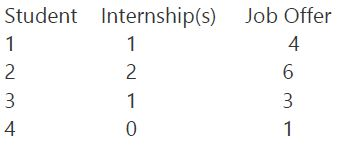

1. What is the independent variable X?
    1.	Internship
    2.	Job Offers
    3.	Marketability in the workplace
    4.	None of the Above


#### Ans 1 - a) Internship

2. Referring to the above data, the estimate of the slope is
    1.	0.4 
    2.	2 
    3.	2.50 
    4.	5



### Solution - To build an OLS model

In [25]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats as st
import statsmodels.api as sm

In [7]:
X = np.array([1,2,1,0])
Y = np.array([4,6,3,1])

X = sm.add_constant(X)

In [9]:
Y

array([4, 6, 3, 1])

In [10]:
reg_model = sm.OLS(Y,X).fit()

print(reg_model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     50.00
Date:                Mon, 29 Aug 2022   Prob (F-statistic):             0.0194
Time:                        20:11:55   Log-Likelihood:                -1.5169
No. Observations:                   4   AIC:                             7.034
Df Residuals:                       2   BIC:                             5.806
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.433      2.309      0.1

C:\Users\NageshN\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Ans 1.1  - The estimate of the slope is 2.5  (option c)

## Q2

Q2: Score received on an exam measured in "percentage points" (Y) is regressed on “percentage attendance” (X) for 22 students in the course Statistics for Data Science. If the Y intercept, b0 = 39.39 and the slope, b1 = 0.341, which of the following statement is correct? 
- a)	If attendance increases by 0.341%, the estimated average score received will increase by 1 percentage point. 
- b)	If attendance increases by 1%, the estimated average score received will increase by 39.39 percentage points. 
- c)	If attendance increases by 1%, the estimated average score received will increase by 0.341 percentage points. 
- d)	If the score received increases by 39.39%, the estimated average attendance will go up by 1%.


#### Approach - Here the predictor is attendance and the outcome is exam score

#### Ans (c) - If the attendance increases by 1%, the score will increase by .341%

## Q3

Q3. A survey was conducted to see if a relation exists between expenditure on higher
education (X), and Salary growth in percentage (Y). The result obtained is summarized
in the table. Write down the regression equation.

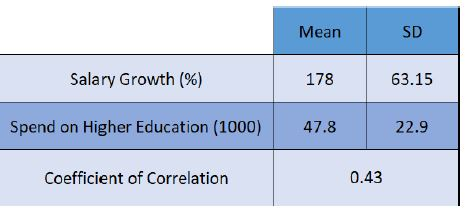

#### Approach - Here the means, standard deviation and pearsonr coefficient are already given. We can directly apply the formulas

In [11]:
x_mean = 47.8
y_mean = 178
sd_x = 22.9
sd_y = 63.15
r = 0.43

In [13]:
b_1 = round(r *sd_y/sd_x,3)
b_0 = round(y_mean - b_1*x_mean,3)

print('The regression equation is y = ', b_0, ' + ', b_1 , '* ', 'x')

The regression equation is y =  121.309  +  1.186 *  x


#### Ans - The regression equation is mentioned below :

y =  121.309  +  1.186 *  x

## Q4

Q4. A model was built to determine how crime rate in the neighbourhood impacts
property prices in USA. The incomplete coefficient table is shown below.
Calculate the rate at which the property price changes for unit change in the Crime Rate
(CRIM).

Note - The price is in 100,000 INR

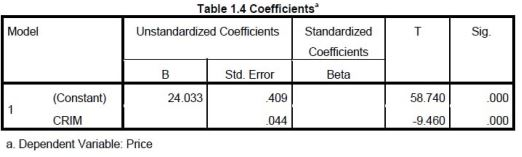

#### Approach - Since the t-statistic is calculated assuming the H0 values of b0 and b1 to be equal to zero, we can reverse that to calculate b1 in this case.

In [23]:
# We will calculate only for b1 as it has been asked.

t_b1 = -9.460
se_b1 = .044

b1 = abs(t_b1) *se_b1 # We make the calculation based on the absolute value, as we can mention the negative direction in the answer

price_change = b1*100000

print('The rate at which unit change in crime affects change in property prices is INR', price_change, ' in the negative direction.')
print('Thus the property rates go down by INR', price_change , 'when crime rate increases by 1 %.')


The rate at which unit change in crime affects change in property prices is INR 41624.0  in the negative direction.
Thus the property rates go down by INR 41624.0 when crime rate increases by 1 %.


## Q5

Q5. Ajishek Bacchan, researcher at GharDekho.com claims that for every unit increase in
crime rate, the price will decrease by at least INR 30,000. Check whether Mr. Bacchan is
correct at 95% confidence level.

He also claims that when CRIM = 0, the average price of the property will be 24.033. Is
he correct? Explain your conclusion.

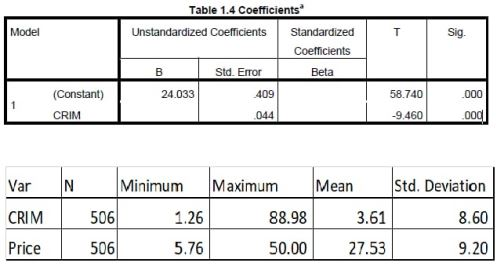

In [36]:
# We can conduct a t-test for b0

H0 : b1 <= -0.3
H1 : b1 > -0.3
    
# b1 has already been calculated in Q4

b1 = b1
b1_hat = -0.3
sd = 8.6
n = 506
se = sd/(np.math.sqrt(n))
dof = n-1


t_stat = (b1_hat - b1)/se

p = st.t.sf(abs(t_stat), dof)



print('The p value is', round(p,3))

The p value is 0.031


### Ans - We can reject the null hypothesis that price decrease would be higher than 0.3. We are inclined to assume that the price decrease would be less than 30,000 INR

#### We also believe that the explanation is correct that when CRIM =0, the property price would be 24.033 (in units of 100,000). The reason is that the intercept as per the linear regression model is 24.033 which by definition is the average 'y' value when x =0. 

## Q6

Q6. Tuck Maintenance:
A trucking company wants to predict its yearly maintenance expense for its trucks using
miles driven. Its data is saved in the file: MLR_TruckMaintenence.xlsx
- a) Estimate the MLR equation for maintenance expense vs miles driven.
- b) Interpret R-Squared for this dataset.

https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/tree/main/ClassAssignment/Assignment05

In [39]:
#Reading the excel file into a dataframe

df_truck_maint = pd.read_excel('MLR_TruckMaintenance.xlsx')

In [40]:
df_truck_maint.head()

,Truck,Maintenance Expense,Miles Driven,Age of Truck,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,908.56,10500,10,NaN,NaN,NaN
1,2,751.12,9700,7,NaN,NaN,NaN
2,3,793.55,9200,8,NaN,NaN,NaN
3,4,619.61,8300,9,NaN,NaN,NaN
4,5,380.11,6500,5,NaN,NaN,NaN


In [41]:
df_truck_maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Truck                23 non-null     int64  
 1   Maintenance Expense  23 non-null     float64
 2   Miles Driven         23 non-null     int64  
 3   Age of Truck         23 non-null     int64  
 4   Unnamed: 4           0 non-null      float64
 5   Unnamed: 5           0 non-null      float64
 6   Unnamed: 6           0 non-null      float64
dtypes: float64(4), int64(3)
memory usage: 1.4 KB


In [42]:
#Unnamed 4,5,6 can be dropped

df_truck_maint.drop(labels = ['Unnamed: 4','Unnamed: 5' , 'Unnamed: 6'], axis = 1, inplace = True)
df_truck_maint.head()

,Truck,Maintenance Expense,Miles Driven,Age of Truck
0,1,908.56,10500,10
1,2,751.12,9700,7
2,3,793.55,9200,8
3,4,619.61,8300,9
4,5,380.11,6500,5


In [43]:
#Here the dependent variable is Expense and the predictor variable is 'Miles Driven'
#Renaming the columns to snake case to ensure that there are no spaces

df_truck_maint.columns = ['truck', 'maintenance_expense' , 'miles_driven', 'age_of_truck']

X = df_truck_maint.miles_driven
Y = df_truck_maint.maintenance_expense

X = sm.add_constant(X)

reg_model = sm.OLS(Y,X).fit()

print(reg_model.summary())



                             OLS Regression Results                            
Dep. Variable:     maintenance_expense   R-squared:                       0.948
Model:                             OLS   Adj. R-squared:                  0.945
Method:                  Least Squares   F-statistic:                     382.2
Date:                 Tue, 30 Aug 2022   Prob (F-statistic):           5.92e-15
Time:                         16:43:24   Log-Likelihood:                -128.22
No. Observations:                   23   AIC:                             260.4
Df Residuals:                       21   BIC:                             262.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.2242     29.398    

In [46]:
#Retrieving the coefficients and writing the Regression equation. 
reg_model.params

const           13.224155
miles_driven     0.080061
dtype: float64

In [52]:
b0 = round(reg_model.params.const,3)
b1 = round(reg_model.params.miles_driven,3)

print('The equation is mentioned below')
print('Maintenance expense = ', b0, ' + ', b1, ' x ', 'Miles driven ' )

The equation is mentioned below
Maintenance expense =  13.224  +  0.08  x  Miles driven 


### Ans 6a - Mentioned above

In [60]:
#R square interpretation
r_sq = round(reg_model.rsquared,3)

print('The R-squared value is ', r_sq)
print('This implies that the variation in Maintenance expense can be explained', r_sq*100, '% of the time by Miles Driven' )

The R-squared value is  0.948
This implies that the variation in Maintenance expense can be explained 94.8 % of the time by Miles Driven


### Ans 6b - Mentioned above

## Q7

Q7. MLR – Overhead Cost
Benedrix, a machine tool company in interested in understand the impact of machine
hours and production run, on its overhead cost.
The data on a monthly basis for 3 years is provided in the dataset:
MLR_Q09_FactoryOverhead.csv

Fit the regression equations:
- 1.Overhead = F (machine hours)
- 2.Overhead = F (production runs)

Kindly answer the below questions
- a) Is production run strongly correlated with machine hours?
- b) Find the R-Squared in both the above cases?
- c) Which variable is a better predictor of Overhead cost?


The data files can be found here: https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/tree/main/ClassAssignment/Assignment05

### - Approach : Here, the ask is to find out the the overhead cost dependency on two variables, machine hours and production runs, through two separate regression equations

### 7.1- Regression between machine hours and overhead cost

In [65]:
# Reading the file into a DataFrame

df_fact_oh = pd.read_csv('MLR_FactoryOverhead.csv')
df_fact_oh.head()

,Month,Machine Hours,Production Runs,Overhead Cost
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968


In [66]:
#Checking for data quality
df_fact_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Month            36 non-null     int64
 1   Machine Hours    36 non-null     int64
 2   Production Runs  36 non-null     int64
 3   Overhead Cost    36 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [71]:
#Converting column names to snake case 

df_fact_oh.columns = ['month','machine_hours', 'production_hours', 'overhead_cost']


#Converting machine hours, production hours and overhead cost to float data type

df_fact_oh = df_fact_oh.astype({'machine_hours':float, 'production_hours':float, 'overhead_cost':float })

df_fact_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             36 non-null     int32  
 1   machine_hours     36 non-null     float64
 2   production_hours  36 non-null     float64
 3   overhead_cost     36 non-null     float64
dtypes: float64(3), int32(1)
memory usage: 1.1 KB


In [72]:
#Creating the regression model for machine hours to overhead cost


X = df_fact_oh.machine_hours
Y = df_fact_oh.overhead_cost

X = sm.add_constant(X)

reg_model_fact_oh = sm.OLS(Y,X).fit()

print(reg_model_fact_oh.summary())

                            OLS Regression Results                            
Dep. Variable:          overhead_cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.57e-05
Time:                        17:29:53   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.862e+04   1.07e+04      4.533

In [73]:
#Retrieving the coefficients and writing the Regression equation. 

b0_fact = round(reg_model_fact_oh.params.const,3)
b1_fact = round(reg_model_fact_oh.params.machine_hours,3)

print('The equation is mentioned below')
print('Overhead Cost = ', b0_fact, ' + ', b1_fact, ' x ', 'Machine_hours ' )

The equation is mentioned below
Overhead Cost =  48621.355  +  34.702  x  Machine_hours 


### 7.2- Regression between production hours and overhead cost

In [74]:
#Creating the regression model for production hours to overhead cost


X = df_fact_oh.production_hours
Y = df_fact_oh.overhead_cost

X = sm.add_constant(X)

reg_model_fact_oh_2 = sm.OLS(Y,X).fit()

print(reg_model_fact_oh_2.summary())

                            OLS Regression Results                            
Dep. Variable:          overhead_cost   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Tue, 30 Aug 2022   Prob (F-statistic):            0.00114
Time:                        17:33:29   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.561e+04   6808.611  

In [76]:
#Retrieving the coefficients and writing the Regression equation. 

b0_fact_2 = round(reg_model_fact_oh_2.params.const,3)
b1_fact_2 = round(reg_model_fact_oh_2.params.production_hours,3)

print('The equation is mentioned below')
print('Overhead Cost = ', b0_fact_2, ' + ', b1_fact_2, ' x ', 'Production_hours ' )

The equation is mentioned below
Overhead Cost =  75605.516  +  655.071  x  Production_hours 


### 7.a- Is production run strongly correlated with machine hours?

In [82]:
# We can find out the pearson correlation between overhead cost and machine hours

X = df_fact_oh.machine_hours
Y = df_fact_oh.overhead_cost

r = round(st.pearsonr(X,Y)[0],3)
print('The correlation between machine hours and overhead cost is', r)
print('This suggests a high correlation')

The correlation between machine hours and overhead cost is 0.632
This suggests a high correlation


### Ans 7.a - It has a strong correlation (0.632)

### 7.b- Find the R-Squared in both the above cases?

In [87]:
#We can retrieve the R-squared from both the models

r_sq_mach_hours = round(reg_model_fact_oh.rsquared,3)
r_sq_prod_hours = round(reg_model_fact_oh_2.rsquared,3)



In [88]:
r_sq_mach_hours

0.399

In [89]:
r_sq_prod_hours

0.271

### 7.c- Which variable is a better predictor of Overhead Cost?

In [96]:
# Retrieving the models for both
print('The Model for Machine Hours')
print(reg_model_fact_oh.summary())

print('The Model for Production Hours')
print('\n')
print(reg_model_fact_oh_2.summary())


The Model for Machine Hours
                            OLS Regression Results                            
Dep. Variable:          overhead_cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.57e-05
Time:                        17:58:11   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.8

#### Ans 7.c - The Rsquared for machine hours is higher but the p value for the t-statistic is lower than production hours. Hence the 'Production Hours' model is a better fit than the 'Machine Hours' model. 

#### The CCPR plots for both models also suggest that for production hours, fewer data points exert high influence, in comparision to machine hours. Hence by both indicators, 'Production Hours' is a better predictor for Overhead Cost. 

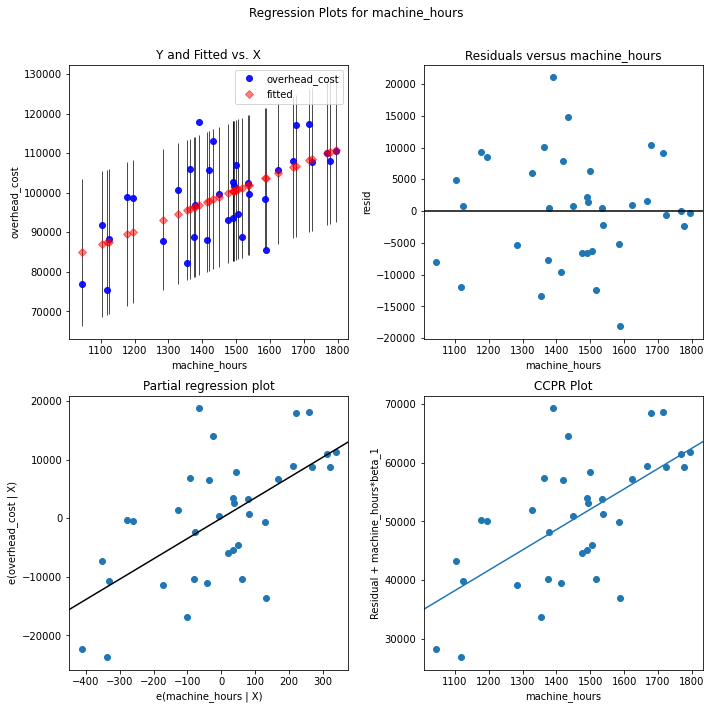

In [98]:
#Also checking through visualizations

# Define figure size
figure = plt.figure(figsize=(10,10))

# Produce regression plots
fig=sm.graphics.plot_regress_exog(reg_model_fact_oh, 'machine_hours', fig=figure)

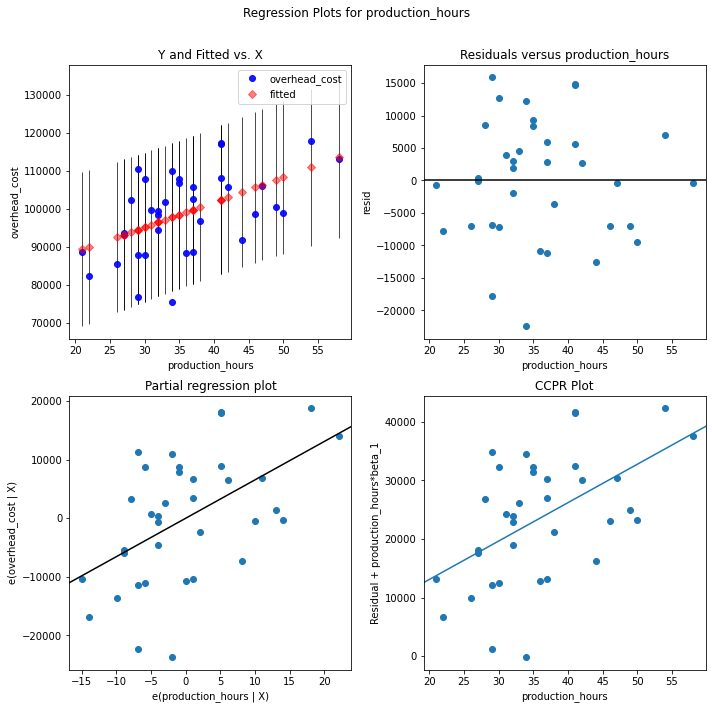

In [100]:
#Also checking through visualizations

# Define figure size
figure_2 = plt.figure(figsize=(10,10))

# Produce regression plots
fig_2=sm.graphics.plot_regress_exog(reg_model_fact_oh_2, 'production_hours', fig=figure_2)

In [101]:
# The CCPR plot visualization also supports 'production_hours' to be a better fit. 